### Imports

In [0]:
import os, shutil
from google.colab import drive
from keras import layers
from keras import models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
drive.mount('/content/drive')
one_month_temp = '/content/drive/My Drive/Datasets/EnergyDataset'

os.chdir(one_month_temp)
print(os.listdir())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
['one-month.csv', 'test.csv', 'one-month-Dup.csv']


### Set-up Big Query

In [50]:
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()
print('Authenticated')
project_id = 'calgaryhacks'

client = bigquery.Client(project=project_id)

Authenticated


In [101]:
march_nine = client.query('SELECT * FROM `calgaryhacks.2016_usage.2016_usage` where date like "%2016-03-09%" order by hour').to_dataframe()
asNump = np.array(march_nine.iloc[:,3])
print(asNump)

[0.208602 0.203547 0.196686 0.203064 0.188643 0.210957 0.237912 0.262077
 0.264732 0.259878 0.230988 0.215439 0.210447 0.212445 0.227544 0.221658
 0.256824 0.297474 0.34596  0.351807 0.344088 0.33651  0.286392 0.260997]


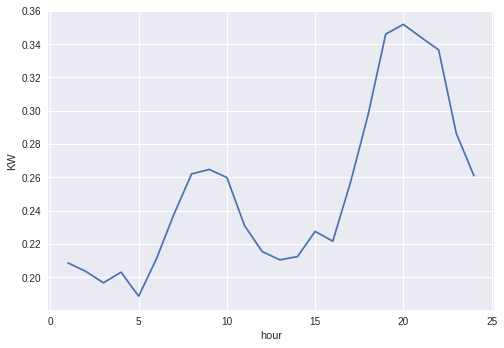

In [102]:
plt.plot(range(1, 25), asNump)
plt.xlabel('hour')
plt.ylabel('KW')
plt.show()

### Slice the data intro train features and labels

In [124]:
train_data = march_nine.iloc[:,1:3].astype('float32')
train_labels = march_nine.iloc[:, 3].astype('float32')
print(train_labels)

0     0.208602
1     0.203547
2     0.196686
3     0.203064
4     0.188643
5     0.210957
6     0.237912
7     0.262077
8     0.264732
9     0.259878
10    0.230988
11    0.215439
12    0.210447
13    0.212445
14    0.227544
15    0.221658
16    0.256824
17    0.297474
18    0.345960
19    0.351807
20    0.344088
21    0.336510
22    0.286392
23    0.260997
Name: usage, dtype: float32


### Specifying the model

In [0]:
# Define the network
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(1000, activation='relu', input_shape=(2,)))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer="adam", loss='mse')
    return model

In [152]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 1000)              3000      
_________________________________________________________________
dense_56 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_57 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 1001      
Total params: 2,006,001
Trainable params: 2,006,001
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [0]:
history = model.fit(train_data, train_labels, epochs=10000, verbose=0)

### Visualize the data

In [160]:
the_result = model.evaluate(train_data, train_labels)
print(the_result)
# plt.plot(range(1, len(model_loss)+1), model_loss)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show()

24/24 [==============================] - 0s 551us/step
2.980080751058267e-07


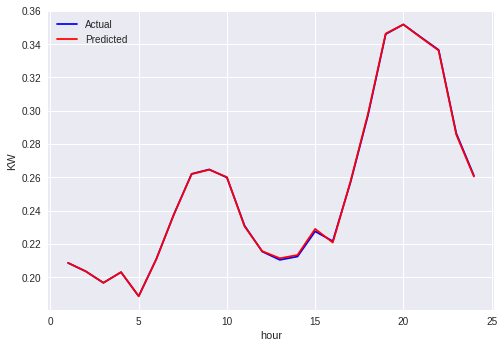

In [162]:
actual = asNump
predictions = model.predict(train_data)

plt.plot(range(1, 25), actual, 'b', label='Actual')
plt.plot(range(1, 25), predictions, 'r', label='Predicted')
plt.xlabel('hour')
plt.ylabel('KW')
plt.legend()
plt.show()

### Test the model and export

In [0]:
model.save('my_model.h5')